<a href="https://colab.research.google.com/github/Arunkumar027/Interncareer-task/blob/main/DL_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install datasets


In [28]:
from datasets import load_dataset

# Load the dataset from Hugging Face
df = load_dataset("NissrineH/AIS-Australian_Institute_of_Sports")

DatasetDict({
    train: Dataset({
        features: ['athlete', 'rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht', 'wt', 'sex', 'sport'],
        num_rows: 202
    })
})

In [6]:
# Save the dataset as a CSV file
df.to_csv('ais_dataset.csv', index=False)


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error




In [29]:
# Load the dataset (replace with actual data loading)
df = pd.read_csv('ais_dataset.csv')  # Replace with actual dataset path
df

,athlete,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,m,W_Polo
198,199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,m,Tennis
199,200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,m,Tennis
200,201,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1,m,Tennis


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 231.1742 - val_loss: 202.8541
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 217.3852 - val_loss: 194.6015
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 223.6518 - val_loss: 184.5311
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 214.9844 - val_loss: 170.9317
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 190.4090 - val_loss: 152.0517
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 163.7871 - val_loss: 126.2061
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 138.7909 - val_loss: 92.1752
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 97.8490 - val_loss: 55.2412
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 62.9667 - val_loss: 27.0764
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34.3468 - val_loss: 13.4042
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.4727 - val_loss: 10.0637
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━

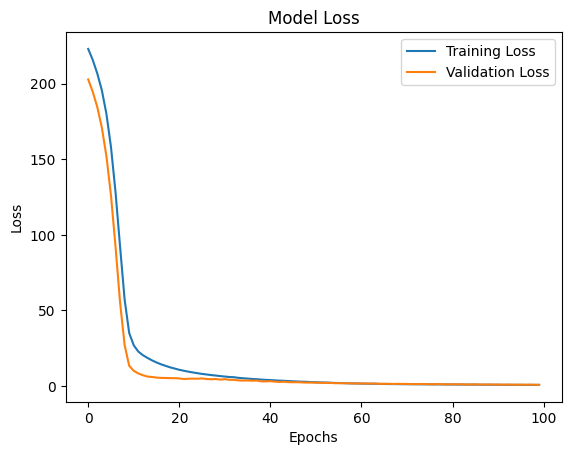

In [42]:
# Load the dataset (replace with actual data loading)
df = pd.read_csv('ais_dataset.csv')  # Replace with actual dataset path

# Define features (X) and target (y)
A = df[['ht', 'wt', 'lbm', 'ssf', 'hg', 'rcc']]  # Replace with relevant features
b = df['pcBfat']  # Target: Body fat percentage

# Data Preprocessing (scaling the features)
scaler = StandardScaler()
A_scaled = scaler.fit_transform(X)

# Train-test split
A_train, A_test, b_train, b_test = train_test_split(A_scaled, b, test_size=0.2, random_state=42)

# Build the Deep Learning Model
model = Sequential()

model.add(Dense(32, input_dim=A_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='linear'))

# Step 5: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
history = model.fit(A_train, b_train, epochs=100, batch_size=8, validation_split=0.2)

# Step 7: Evaluate the model
b_pred = model.predict(A_test)
b_pred

# Calculate metrics
mse = mean_squared_error(b_test, b_pred)
r2 = r2_score(b_test, b_pred)
print(f'Mean Squared Error on test data: {mse}')
print(f'R-squared on test data: {r2}')
print(f'Predicted body fat percentage: {b_pred[:5].flatten()}')
print(f'Actual body fat percentage: {b_test[:5].values}')

# Step 8: Plotting training loss (optional)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
